<a href="https://colab.research.google.com/github/Advait-git123/Organic_Solvation_GNN-pyg-/blob/main/Organic_Solvation_GNN-pyg-/dl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install ONLY RDKit using the direct pip method (verbose)
print("--- Installing RDKit ---")
!pip install rdkit

# --- Immediate Import Test ---
try:
    from rdkit import Chem
    print("\n--- RDKit Import SUCCESSFUL ---")

except ImportError as e:
    print("\n--- RDKit Import FAILED ---")
    print(e)
    print("Stopping execution. RDKit installation failed even in a fresh notebook.")
    # If this fails, there's a deeper Colab or package issue.
    raise SystemExit("RDKit installation failed.")

# If RDKit is successful, install pandas
print("\n--- Installing pandas ---")
!pip install -q pandas
import pandas as pd
print("Pandas imported successfully.")

--- Installing RDKit ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 24.2 MB/s eta 0:00:00

--- RDKit Import SUCCESSFUL ---

--- Installing pandas ---
Pandas imported successfully.


In [ ]:
# Install PyTorch Geometric and its dependencies
print("\n--- Installing PyTorch Geometric ---")
# Use Python directly to get the torch version for the URL
import torch
pytorch_version = torch.__version__

!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-{pytorch_version}.html
!pip install -q torch-geometric

# --- Final PyG Import Test ---
try:
    import torch_geometric
    print("\n--- PyTorch Geometric Import SUCCESSFUL ---")
except ImportError as e:
    print("\n--- PyTorch Geometric Import FAILED ---")
    print(e)
    # This would indicate a problem compiling PyG components.


--- Installing PyTorch Geometric ---
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.6 MB/s eta 0:00:00

--- PyTorch Geometric Import SUCCESSFUL ---


In [ ]:
# --- Downloading Data & Git Setup ---
# Download data into the current directory (/content/solvation-gnn)
!wget -O ML_Gibbs_Full_Database.csv https://zenodo.org/records/8121619/files/ML_Gibbs_Full_Database_v1.1.csv

# Create/update the .gitignore file to exclude the large data file
!echo "ML_Gibbs_Full_Database.csv" >> .gitignore

# Verify files are present
!ls

--2025-11-08 13:30:06--  https://zenodo.org/records/8121619/files/ML_Gibbs_Full_Database_v1.1.csv
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8017227 (7.6M) [text/plain]
Saving to: ‘ML_Gibbs_Full_Database.csv’

ML_Gibbs_Full_Datab 100%[===================>]   7.65M   740KB/s    in 13s     

2025-11-08 13:30:20 (601 KB/s) - ‘ML_Gibbs_Full_Database.csv’ saved [8017227/8017227]

ML_Gibbs_Full_Database.csv  sample_data


In [ ]:
# 1. Verify Current Directory (Should be /content/solvation-gnn)
!pwd

# 2. Check if the file exists and its size (Should be around 7.6M)
!ls -lh ML_Gibbs_Full_Database.csv

/content
-rw-r--r-- 1 root root 7.7M Nov  8 13:30 ML_Gibbs_Full_Database.csv


In [ ]:
# 1. Delete the corrupted (empty) file
!rm ML_Gibbs_Full_Database.csv

# 2. Re-run the download command (watch the output for success)
print("--- Redownloading the dataset ---")
!wget -O ML_Gibbs_Full_Database.csv https://zenodo.org/records/8121619/files/ML_Gibbs_Full_Database_v1.1.csv

# 3. Verify the size again (Should be ~7.6M or 8.0M now)
print("\n--- Verifying file size ---")
!ls -lh ML_Gibbs_Full_Database.csv

--- Redownloading the dataset ---
--2025-11-08 13:30:20--  https://zenodo.org/records/8121619/files/ML_Gibbs_Full_Database_v1.1.csv
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8017227 (7.6M) [text/plain]
Saving to: ‘ML_Gibbs_Full_Database.csv’

ML_Gibbs_Full_Datab 100%[===================>]   7.65M  1.06MB/s    in 11s     

2025-11-08 13:30:32 (686 KB/s) - ‘ML_Gibbs_Full_Database.csv’ saved [8017227/8017227]


--- Verifying file size ---
-rw-r--r-- 1 root root 7.7M Nov  8 13:30 ML_Gibbs_Full_Database.csv


In [ ]:
data_df = pd.read_csv('ML_Gibbs_Full_Database.csv')
print(data_df.columns) # This will list all column headers

Index(['Database Origin', 'Solvent SMILES', 'Solvent InChlKey', 'Solvent Type',
       'Solute SMILES', 'Solute InChlKey', 'Solute Type',
       'Solvation Free Energy', 'BalabanJ_slv', 'BertzCT_slv',
       ...
       'VSA_EState1_slt', 'VSA_EState10_slt', 'VSA_EState2_slt',
       'VSA_EState3_slt', 'VSA_EState4_slt', 'VSA_EState5_slt',
       'VSA_EState6_slt', 'VSA_EState7_slt', 'VSA_EState8_slt',
       'VSA_EState9_slt'],
      dtype='object', length=220)


In [ ]:
# --- Loading Data & Final Imports ---
import pandas as pd
import torch
import numpy as np
from rdkit import Chem # Should work now
from rdkit.Chem import AllChem
from torch_geometric.data import Data

print("\n--- All Libraries Imported Successfully ---")

# Load data and select essential columns
data_df = pd.read_csv('ML_Gibbs_Full_Database.csv')
data_for_model = data_df[['Solute SMILES', 'Solvent SMILES', 'Solvation Free Energy']].dropna().copy()

print("\n--- Data Loaded Successfully ---")
print(data_for_model.head())
print(f"\nTotal data points: {len(data_for_model)}")
print("\n--- Environment Ready for Featurization Code ---")


--- All Libraries Imported Successfully ---

--- Data Loaded Successfully ---
      Solute SMILES Solvent SMILES  Solvation Free Energy
0    CCCCCCCOC(=O)C         C(=O)N              -4.843271
1      c1ccc(cc1)Br         C(=O)N              -4.120078
2   C(Cl)(Cl)(Cl)Cl         C(=O)N              -2.169118
3  c1ccc(c(c1)Cl)Cl         C(=O)N              -4.543017
4        CCCCCCCCCO         C(=O)N              -7.216940

Total data points: 6239

--- Environment Ready for Featurization Code ---


In [ ]:
# --- Featurizer Cell (31 Atom Features) ---
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import torch
from torch_geometric.data import Data

# --- RDKit Logging (Silence Warnings) ---
from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
# ---

# Helper function for one-hot encoding
def one_hot_encode(val, allowed_set, include_other=True):
    """Creates a one-hot vector."""
    if include_other:
        vec = [0] * (len(allowed_set) + 1)
        if val in allowed_set:
            vec[allowed_set.index(val)] = 1
        else:
            vec[-1] = 1 # 'Other'
    else:
        vec = [0] * len(allowed_set)
        if val in allowed_set:
            vec[allowed_set.index(val)] = 1
    return vec

def one_hot_boolean(val):
    """Creates a 2-dim one-hot vector for a boolean (True/False)."""
    return [1, 0] if val else [0, 1]

def smiles_to_graph(smiles_string):
    """Converts a SMILES string into a PyG Data object with 31 atom features."""
    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None: return None

    mol = Chem.AddHs(mol)
    try:
        # Generate 3D coordinates for charge calculation
        AllChem.EmbedMolecule(mol, AllChem.ETKDG())
        AllChem.ComputeGasteigerCharges(mol)
    except Exception as e:
        # Fallback if 3D embedding fails
        try:
            AllChem.ComputeGasteigerCharges(mol) # Try again without 3D
        except:
            return None # Fail if charges cannot be computed

    atom_features = []
    # --- Node (Atom) Features (Total 31) ---
    for atom in mol.GetAtoms():
        features = []

        # [cite_start]1. Atom Type (10 dim) [cite: 85]
        features.extend(one_hot_encode(atom.GetSymbol(),
            ['C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Br', 'I'], include_other=True))

        # [cite_start]2. Formal Charge (1 dim) [cite: 87]
        features.append(atom.GetFormalCharge())

        # [cite_start]3. Hybridization (3 dim) [cite: 88]
        features.extend(one_hot_encode(atom.GetHybridization(),
            [Chem.HybridizationType.SP, Chem.HybridizationType.SP2, Chem.HybridizationType.SP3], include_other=False))

        # [cite_start]4. Hydrogen Bonding (3 dim: Donor, Acceptor, Neither) [cite: 89]
        is_acceptor = atom.GetAtomicNum() in [7, 8, 9] # N, O, F
        is_donor = (atom.GetAtomicNum() in [7, 8]) and (atom.GetTotalNumHs() > 0)
        if is_donor:
            features.extend([1, 0, 0])
        elif is_acceptor:
            features.extend([0, 1, 0])
        else:
            features.extend([0, 0, 1])

        # [cite_start]5. Aromatic (2 dim: Yes, No) [cite: 90]
        features.extend(one_hot_boolean(atom.GetIsAromatic()))

        # [cite_start]6. Degree (6 dim: 0-5) [cite: 91]
        features.extend(one_hot_encode(atom.GetDegree(), [0, 1, 2, 3, 4, 5], include_other=False))

        # [cite_start]7. Number of Hydrogens (5 dim: 0-4) [cite: 92]
        features.extend(one_hot_encode(atom.GetTotalNumHs(), [0, 1, 2, 3, 4], include_other=False))

        # [cite_start]8. Partial Charge (1 dim) [cite: 93]
        try:
            partial_charge = float(atom.GetProp('_GasteigerCharge'))
            if np.isnan(partial_charge) or np.isinf(partial_charge): partial_charge = 0.0
        except:
            partial_charge = 0.0
        features.append(partial_charge)

        # TOTAL: 10 + 1 + 3 + 3 + 2 + 6 + 5 + 1 = 31 dimensions
        atom_features.append(features)

    x = torch.tensor(atom_features, dtype=torch.float)

    # --- Edge (Bond) Features (Total 11) ---
    edge_indices = []
    edge_features = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        features = []

        # [cite_start]1. Bond Type (4 dim) [cite: 96]
        features.extend(one_hot_encode(bond.GetBondType(),
            [Chem.BondType.SINGLE, Chem.BondType.DOUBLE, Chem.BondType.TRIPLE, Chem.BondType.AROMATIC], include_other=False))

        # [cite_start]2. Same Ring (2 dim: Yes, No) [cite: 97]
        features.extend(one_hot_boolean(bond.IsInRing()))

        # [cite_start]3. Conjugated (2 dim: Yes, No) [cite: 98]
        features.extend(one_hot_boolean(bond.GetIsConjugated()))

        # [cite_start]4. Stereo (3 dim: E, Z, None) [cite: 100]
        features.extend(one_hot_encode(bond.GetStereo(),
            [Chem.BondStereo.STEREOE, Chem.BondStereo.STEREOZ], include_other=True))

        # TOTAL: 4 + 2 + 2 + 3 = 11 dimensions
        edge_indices.extend([[i, j], [j, i]])
        edge_features.extend([features, features])

    edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, smiles=smiles_string)

    # Final check
    if data.x.shape[1] != 31:
        print(f"Warning: Featurizer created {data.x.shape[1]} features, not 31.")

    return data

# --- Test the new featurizer ---
test_graph = smiles_to_graph('CCO') # Ethanol
if test_graph:
    print(f"\n--- Featurization Test for 'CCO' ---")
    print(test_graph)
    print(f"Node feature matrix shape: {test_graph.x.shape}")
    print(f"Edge feature matrix shape: {test_graph.edge_attr.shape}")
    if test_graph.x.shape[1] == 31 and test_graph.edge_attr.shape[1] == 11:
        print("\n--- SUCCESS: Dimensions (31, 11) match paper! ---")
    else:
        print("\n--- WARNING: Dimensions do not match paper! ---")
else:
    print("Error: Could not process SMILES 'CCO'")


--- Featurization Test for 'CCO' ---
Data(x=[9, 31], edge_index=[2, 16], edge_attr=[16, 11], smiles='CCO')
Node feature matrix shape: torch.Size([9, 31])
Edge feature matrix shape: torch.Size([16, 11])

--- SUCCESS: Dimensions (31, 11) match paper! ---


In [ ]:
# --- Re-run featurization for Ethanol ---
test_smiles = 'CCO'
graph_data = smiles_to_graph(test_smiles)

if graph_data:
    print(f"\n--- Inspecting Graph Tensors for Ethanol ('{test_smiles}') ---")

    # --- 1. Node Features (x) ---
    print("\n## Node Feature Matrix (x):")
    print(f"Shape: {graph_data.x.shape}")
    print("Content (each row is an atom, columns are features):")
    # Convert tensor to numpy for easier viewing, show first few rows/cols if large
    import pandas as pd
    x_df = pd.DataFrame(graph_data.x.numpy())
    print(x_df.head()) # Print first 5 atoms
    # Recall the 29 features: AtomType(10), FormalCharge(1), Hyb(3), H-Bond(2), Aromatic(1), Degree(6), NumHs(5), PartialCharge(1)

    # --- 2. Edge Index (edge_index) ---
    print("\n## Edge Index Matrix (edge_index):")
    print(f"Shape: {graph_data.edge_index.shape}")
    print("Content (pairs of connected atom indices [source -> target]):")
    print(graph_data.edge_index)
    # This shows which atoms (by their row index in 'x') are connected.

    # --- 3. Edge Features (edge_attr) ---
    print("\n## Edge Feature Matrix (edge_attr):")
    print(f"Shape: {graph_data.edge_attr.shape}")
    print("Content (each row corresponds to an edge in edge_index, columns are features):")
    edge_df = pd.DataFrame(graph_data.edge_attr.numpy())
    print(edge_df.head()) # Print features for first 5 edges
    # Recall the 12 features: BondType(4), InRing(1), Conjugated(1), Stereo(6)

else:
    print(f"Error processing SMILES: {test_smiles}")


--- Inspecting Graph Tensors for Ethanol ('CCO') ---

## Node Feature Matrix (x):
Shape: torch.Size([9, 31])
Content (each row is an atom, columns are features):
    0    1    2    3    4    5    6    7    8    9   ...   21   22   23   24  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   

    25   26   27   28   29        30  
0  1.0  0.0  0.0  0.0  0.0 -0.041838  
1  1.0  0.0  0.0  0.0  0.0  0.040221  
2  1.0  0.0  0.0  0.0  0.0 -0.396664  
3  1.0  0.0  0.0  0.0  0.0  0.025373  
4  1.0  0.0  0.0  0.0  0.0  0.025373  

[5 rows x 31 columns]

## Edge Index Matrix (edge_index):
Shape: torch.Size([2, 16])
Content (pairs of connected atom ind

In [ ]:
import torch
from torch.utils.data import Dataset, random_split
from torch_geometric.loader import DataLoader
from torch_geometric.data import Batch
import numpy as np # Make sure numpy is imported

# --- 1. Define the CORRECTED Custom Dataset Class ---
class SolvationDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe.copy() # Work on a copy

        # --- Define the correct original column names ---
        self.original_solute_col = 'Solute SMILES'
        self.original_solvent_col = 'Solvent SMILES'
        self.original_target_col = 'Solvation Free Energy'

        # --- Define the internal names we WANT to use ---
        self.internal_solute_col = 'SoluteSMILES'
        self.internal_solvent_col = 'SolventSMILES'
        self.internal_target_col = 'DeltaGsolv'

        # --- Rename columns for internal consistency ---
        rename_map = {
            self.original_solute_col: self.internal_solute_col,
            self.original_solvent_col: self.internal_solvent_col,
            self.original_target_col: self.internal_target_col
        }
        self.dataframe.rename(columns=rename_map, inplace=True)

    def __len__(self):
        # Returns the total number of samples (rows) in the dataset
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Gets one sample (one row) from the dataset at the given index 'idx'
        # Now uses the consistent INTERNAL column names
        try:
            row = self.dataframe.iloc[idx]
            solute_smiles = row[self.internal_solute_col]
            solvent_smiles = row[self.internal_solvent_col]
            target = row[self.internal_target_col]
        except KeyError as e:
            print(f"KeyError accessing columns at index {idx}. Available columns: {self.dataframe.columns}")
            print(f"Original error: {e}")
            # Handle error, maybe return a random sample
            random_idx = np.random.randint(0, len(self))
            return self[random_idx]
        except IndexError as e:
            print(f"IndexError accessing row at index {idx}. Dataset length: {len(self)}")
            print(f"Original error: {e}")
            # Handle error, maybe return a random sample
            random_idx = np.random.randint(0, len(self))
            return self[random_idx]


        # Convert SMILES to graph objects using your function
        solute_graph = smiles_to_graph(solute_smiles)
        solvent_graph = smiles_to_graph(solvent_smiles)

        # Handle potential errors during graph conversion
        if solute_graph is None or solvent_graph is None:
            print(f"Warning: Skipping index {idx} due to RDKit parsing error for pair: {solute_smiles}, {solvent_smiles}")
            # Return a random valid sample instead to avoid crashing the DataLoader
            random_idx = np.random.randint(0, len(self))
            return self[random_idx]

        # Return the solute graph, solvent graph, and the target energy value
        return solute_graph, solvent_graph, torch.tensor(target, dtype=torch.float)

# --- Now, RE-RUN the Dataset Creation and Splitting ---
print("\n--- Re-creating and Splitting Dataset with Corrected Class ---")
# Use the DataFrame that had the ORIGINAL column names (with spaces)
# This assumes 'data_df' still holds the original loaded data.
# Re-select and clean the data using the CORRECT original names
data_for_model = data_df[['Solute SMILES', 'Solvent SMILES', 'Solvation Free Energy']].dropna().copy()

full_dataset = SolvationDataset(data_for_model)

# Split into training, validation, and test sets (80:10:10 ratio, as per paper)
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42) # For reproducible splits
)

print(f"Dataset sizes: Train={len(train_dataset)}, Val={len(val_dataset)}, Test={len(test_dataset)}")

# --- Re-create DataLoaders ---
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print(f"\n--- DataLoaders Re-Created (Batch Size: {batch_size}) ---")

# --- Re-run Inspection ---
print("\n--- Inspecting one batch from train_loader ---")
try:
    solute_batch_example, solvent_batch_example, target_batch_example = next(iter(train_loader))
    print("Type of solute batch:", type(solute_batch_example))
    print("Number of graphs in solute batch:", solute_batch_example.num_graphs)
    print("Target batch shape:", target_batch_example.shape)
    print("\n--- Data Loading Setup Complete ---")
except Exception as e:
    print(f"\nError inspecting batch: {e}")
    print("There might still be an issue in SolvationDataset or smiles_to_graph.")


--- Re-creating and Splitting Dataset with Corrected Class ---
Dataset sizes: Train=4991, Val=623, Test=625

--- DataLoaders Re-Created (Batch Size: 32) ---

--- Inspecting one batch from train_loader ---


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[13:30:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:30:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)


Type of solute batch: <class 'abc.DataBatch'>
Number of graphs in solute batch: 32
Target batch shape: torch.Size([32])

--- Data Loading Setup Complete ---


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_add_pool, global_max_pool, global_mean_pool

# --- 1. Define the GAT Encoder Module ---
# This processes a single graph (solute or solvent)
class GATEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super().__init__()
        # Paper specifies two GAT layers
        # Layer 1: Input features -> Hidden features * Heads
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=0.1)
        # Layer 2: Hidden features * Heads -> Output features * Heads
        # We use out_channels = hidden_channels for simplicity here, matching paper intent.
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=0.1)
        # Store output dimension for the main model
        self.out_dim = hidden_channels * heads

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Apply first GAT layer with LeakyReLU activation
        x = F.leaky_relu(self.conv1(x, edge_index))
        # Apply second GAT layer with LeakyReLU activation
        x = F.leaky_relu(self.conv2(x, edge_index))
        return x

# --- 2. Define the Main Dual-Encoder Model ---
class DualGATModel(nn.Module):
    def __init__(self, node_in_features):
        super().__init__()

        # --- Encoders (as per paper specs ) ---
        # Solute Encoder (F'=12)
        self.solute_encoder = GATEncoder(
            in_channels=node_in_features,
            hidden_channels=12, # F' for solute
            out_channels=12,    # Final node embedding dim before readout
            heads=4             # 4 attention heads
        )

        # Solvent Encoder (F'=42)
        self.solvent_encoder = GATEncoder(
            in_channels=node_in_features,
            hidden_channels=42, # F' for solvent
            out_channels=42,    # Final node embedding dim before readout
            heads=4             # 4 attention heads
        )

        # --- Readout Function (WeightedSum&Max -> Sum + Max Aggregation)  ---
        # Calculate the size after Sum + Max pooling
        solute_pooled_dim = self.solute_encoder.out_dim * 2 # (Sum dim + Max dim)
        solvent_pooled_dim = self.solvent_encoder.out_dim * 2

        # Linear layers to project pooled features to 128 dim (as per paper )
        self.solute_readout_mlp = nn.Linear(solute_pooled_dim, 128)
        self.solvent_readout_mlp = nn.Linear(solvent_pooled_dim, 128)

        # --- MLP Head (Predictor) [cite: 209, 274] ---
        # Takes concatenated 128+128=256 dim vector
        self.mlp = nn.Sequential(
            nn.Linear(128 + 128, 256),
            nn.ReLU(),
            nn.Dropout(0.2), # Add dropout for regularization
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1) # Final single output for DeltaGsolv
        )

    def forward(self, solute_data, solvent_data):
        # 1. Encode Solute Graph
        solute_node_embeddings = self.solute_encoder(solute_data)

        # 2. Encode Solvent Graph
        solvent_node_embeddings = self.solvent_encoder(solvent_data)

        # 3. Readout (Pool node embeddings to graph level)
        # Apply global sum pooling and global max pooling
        solute_sum = global_add_pool(solute_node_embeddings, solute_data.batch)
        solute_max = global_max_pool(solute_node_embeddings, solute_data.batch)
        # Concatenate sum and max features
        solute_pooled = torch.cat([solute_sum, solute_max], dim=1)

        solvent_sum = global_add_pool(solvent_node_embeddings, solvent_data.batch)
        solvent_max = global_max_pool(solvent_node_embeddings, solvent_data.batch)
        solvent_pooled = torch.cat([solvent_sum, solvent_max], dim=1)

        # Project pooled features to 128 dimensions
        solute_vec = F.relu(self.solute_readout_mlp(solute_pooled))
        solvent_vec = F.relu(self.solvent_readout_mlp(solvent_pooled))

        # 4. Concatenate Solute and Solvent Vectors [cite: 209]
        combined_vec = torch.cat([solute_vec, solvent_vec], dim=1)

        # 5. Predict DeltaGsolv using MLP Head
        prediction = self.mlp(combined_vec)

        # Remove the last dimension (shape [batch_size, 1] -> [batch_size])
        return prediction.squeeze(-1)

# --- Instantiate the model ---
# Get the number of node features from our featurizer (should be 29)
node_feature_dim = graph_data.num_node_features
model = DualGATModel(node_in_features=node_feature_dim)

# Print the model structure (optional)
print("--- Model Architecture ---")
print(model)
# You can also print the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal Trainable Parameters: {num_params:,}")
print("\n--- Model Definition Complete ---")

--- Model Architecture ---
DualGATModel(
  (solute_encoder): GATEncoder(
    (conv1): GATConv(31, 12, heads=4)
    (conv2): GATConv(48, 12, heads=4)
  )
  (solvent_encoder): GATEncoder(
    (conv1): GATConv(31, 42, heads=4)
    (conv2): GATConv(168, 42, heads=4)
  )
  (solute_readout_mlp): Linear(in_features=96, out_features=128, bias=True)
  (solvent_readout_mlp): Linear(in_features=336, out_features=128, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=1, bias=True)
  )
)

Total Trainable Parameters: 258,681

--- Model Definition Complete ---


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_add_pool, global_max_pool, global_mean_pool

# --- 1. Define the GAT Encoder Module ---
# This processes a single graph (solute or solvent)
class GATEncoder(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super().__init__()
        # Paper specifies two GAT layers
        # Layer 1: Input features -> Hidden features * Heads
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=0.1)
        # Layer 2: Hidden features * Heads -> Output features * Heads
        # We use out_channels = hidden_channels for simplicity here, matching paper intent.
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=0.1)
        # Store output dimension for the main model
        self.out_dim = hidden_channels * heads

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Apply first GAT layer with LeakyReLU activation
        x = F.leaky_relu(self.conv1(x, edge_index))
        # Apply second GAT layer with LeakyReLU activation
        x = F.leaky_relu(self.conv2(x, edge_index))
        return x

# --- 2. Define the Main Dual-Encoder Model ---
class DualGATModel(nn.Module):
    def __init__(self, node_in_features):
        super().__init__()

        # --- Encoders (as per paper specs ) ---
        # Solute Encoder (F'=12)
        self.solute_encoder = GATEncoder(
            in_channels=node_in_features,
            hidden_channels=12, # F' for solute
            out_channels=12,    # Final node embedding dim before readout
            heads=4             # 4 attention heads
        )

        # Solvent Encoder (F'=42)
        self.solvent_encoder = GATEncoder(
            in_channels=node_in_features,
            hidden_channels=42, # F' for solvent
            out_channels=42,    # Final node embedding dim before readout
            heads=4             # 4 attention heads
        )

        # --- Readout Function (WeightedSum&Max -> Sum + Max Aggregation)  ---
        # Calculate the size after Sum + Max pooling
        solute_pooled_dim = self.solute_encoder.out_dim * 2 # (Sum dim + Max dim)
        solvent_pooled_dim = self.solvent_encoder.out_dim * 2

        # Linear layers to project pooled features to 128 dim (as per paper )
        self.solute_readout_mlp = nn.Linear(solute_pooled_dim, 128)
        self.solvent_readout_mlp = nn.Linear(solvent_pooled_dim, 128)

        # --- MLP Head (Predictor) [cite: 209, 274] ---
        # Takes concatenated 128+128=256 dim vector
        self.mlp = nn.Sequential(
            nn.Linear(128 + 128, 256),
            nn.ReLU(),
            nn.Dropout(0.2), # Add dropout for regularization
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1) # Final single output for DeltaGsolv
        )

    def forward(self, solute_data, solvent_data):
        # 1. Encode Solute Graph
        solute_node_embeddings = self.solute_encoder(solute_data)

        # 2. Encode Solvent Graph
        solvent_node_embeddings = self.solvent_encoder(solvent_data)

        # 3. Readout (Pool node embeddings to graph level)
        # Apply global sum pooling and global max pooling
        solute_sum = global_add_pool(solute_node_embeddings, solute_data.batch)
        solute_max = global_max_pool(solute_node_embeddings, solute_data.batch)
        # Concatenate sum and max features
        solute_pooled = torch.cat([solute_sum, solute_max], dim=1)

        solvent_sum = global_add_pool(solvent_node_embeddings, solvent_data.batch)
        solvent_max = global_max_pool(solvent_node_embeddings, solvent_data.batch)
        solvent_pooled = torch.cat([solvent_sum, solvent_max], dim=1)

        # Project pooled features to 128 dimensions
        solute_vec = F.relu(self.solute_readout_mlp(solute_pooled))
        solvent_vec = F.relu(self.solvent_readout_mlp(solvent_pooled))

        # 4. Concatenate Solute and Solvent Vectors [cite: 209]
        combined_vec = torch.cat([solute_vec, solvent_vec], dim=1)

        # 5. Predict DeltaGsolv using MLP Head
        prediction = self.mlp(combined_vec)

        # Remove the last dimension (shape [batch_size, 1] -> [batch_size])
        return prediction.squeeze(-1)

# --- Instantiate the model ---
# Get the number of node features from our featurizer (should be 29)
node_feature_dim = graph_data.num_node_features
model = DualGATModel(node_in_features=node_feature_dim)

# Print the model structure (optional)
print("--- Model Architecture ---")
print(model)
# You can also print the number of parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal Trainable Parameters: {num_params:,}")
print("\n--- Model Definition Complete ---")

--- Model Architecture ---
DualGATModel(
  (solute_encoder): GATEncoder(
    (conv1): GATConv(31, 12, heads=4)
    (conv2): GATConv(48, 12, heads=4)
  )
  (solvent_encoder): GATEncoder(
    (conv1): GATConv(31, 42, heads=4)
    (conv2): GATConv(168, 42, heads=4)
  )
  (solute_readout_mlp): Linear(in_features=96, out_features=128, bias=True)
  (solvent_readout_mlp): Linear(in_features=336, out_features=128, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=1, bias=True)
  )
)

Total Trainable Parameters: 258,681

--- Model Definition Complete ---


--- Setting up Advanced Training Environment ---
Using device: cpu
Node feature dimension: 31 (Target: 31)

--- Setting up Checkpointing ---
Mounted at /content/drive
Checkpoints will be saved to: /content/drive/MyDrive/Solvation_GNN_Checkpoints_v2/best_gat_model_adamw.pt

--- Training and Evaluation Functions Defined ---

--- Starting Training ---


[13:31:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:31:38]

Epoch 001/200 | Train RMSE: 2.0335 | Val RMSE: 1.4184 | Val MAE: 1.0318 | LR: 0.001000 | Time: 59.07s
    --> Checkpoint saved! New best Val RMSE: 1.4184


[13:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:32:39]

Epoch 002/200 | Train RMSE: 1.4998 | Val RMSE: 1.4554 | Val MAE: 1.0901 | LR: 0.001000 | Time: 56.89s


[13:33:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:33:30]

Epoch 003/200 | Train RMSE: 1.3432 | Val RMSE: 1.3712 | Val MAE: 1.0348 | LR: 0.001000 | Time: 57.05s
    --> Checkpoint saved! New best Val RMSE: 1.3712


[13:34:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:34:29]

Epoch 004/200 | Train RMSE: 1.1888 | Val RMSE: 0.9279 | Val MAE: 0.6531 | LR: 0.001000 | Time: 57.47s
    --> Checkpoint saved! New best Val RMSE: 0.9279


[13:35:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:23]

Epoch 005/200 | Train RMSE: 1.1140 | Val RMSE: 1.3325 | Val MAE: 1.0174 | LR: 0.001000 | Time: 56.49s


[13:35:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:35:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:21]

Epoch 006/200 | Train RMSE: 1.0400 | Val RMSE: 0.9630 | Val MAE: 0.6991 | LR: 0.001000 | Time: 59.20s


[13:36:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:20]

Epoch 007/200 | Train RMSE: 0.9648 | Val RMSE: 0.9702 | Val MAE: 0.6696 | LR: 0.001000 | Time: 56.06s


[13:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:37:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:20]

Epoch 008/200 | Train RMSE: 0.9145 | Val RMSE: 0.9931 | Val MAE: 0.7414 | LR: 0.001000 | Time: 57.20s


[13:38:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:38:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:17]

Epoch 009/200 | Train RMSE: 0.9058 | Val RMSE: 0.8082 | Val MAE: 0.6169 | LR: 0.001000 | Time: 57.14s
    --> Checkpoint saved! New best Val RMSE: 0.8082


[13:39:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:39:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:13]

Epoch 010/200 | Train RMSE: 0.9220 | Val RMSE: 1.0807 | Val MAE: 0.8205 | LR: 0.001000 | Time: 57.10s


[13:40:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:40:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:10]

Epoch 011/200 | Train RMSE: 0.8604 | Val RMSE: 0.6335 | Val MAE: 0.4499 | LR: 0.001000 | Time: 57.10s
    --> Checkpoint saved! New best Val RMSE: 0.6335


[13:41:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:41:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:11]

Epoch 012/200 | Train RMSE: 0.8190 | Val RMSE: 0.7675 | Val MAE: 0.5228 | LR: 0.001000 | Time: 57.21s


[13:42:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:42:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:08]

Epoch 013/200 | Train RMSE: 0.8733 | Val RMSE: 0.8324 | Val MAE: 0.5723 | LR: 0.001000 | Time: 56.93s


[13:43:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:43:56]

Epoch 014/200 | Train RMSE: 0.8255 | Val RMSE: 0.6846 | Val MAE: 0.4563 | LR: 0.001000 | Time: 57.39s


[13:44:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:44:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:03]

Epoch 015/200 | Train RMSE: 0.8228 | Val RMSE: 0.6597 | Val MAE: 0.4221 | LR: 0.001000 | Time: 56.81s


[13:45:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:45:48]

Epoch 016/200 | Train RMSE: 0.7911 | Val RMSE: 0.6260 | Val MAE: 0.4114 | LR: 0.001000 | Time: 59.32s
    --> Checkpoint saved! New best Val RMSE: 0.6260


[13:46:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:46:54]

Epoch 017/200 | Train RMSE: 0.8188 | Val RMSE: 0.8567 | Val MAE: 0.5985 | LR: 0.001000 | Time: 56.65s


[13:47:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:47:52]

Epoch 018/200 | Train RMSE: 0.8531 | Val RMSE: 0.9035 | Val MAE: 0.6334 | LR: 0.001000 | Time: 57.05s


[13:48:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:48:50]

Epoch 019/200 | Train RMSE: 0.7867 | Val RMSE: 0.7167 | Val MAE: 0.4670 | LR: 0.001000 | Time: 57.06s


[13:49:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:49:41]

Epoch 020/200 | Train RMSE: 0.7758 | Val RMSE: 0.6668 | Val MAE: 0.4298 | LR: 0.001000 | Time: 57.21s


[13:50:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:50:38]

Epoch 021/200 | Train RMSE: 0.7520 | Val RMSE: 0.5836 | Val MAE: 0.3721 | LR: 0.001000 | Time: 56.75s
    --> Checkpoint saved! New best Val RMSE: 0.5836


[13:51:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:51:47]

Epoch 022/200 | Train RMSE: 0.7792 | Val RMSE: 0.5954 | Val MAE: 0.4388 | LR: 0.001000 | Time: 56.96s


[13:52:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:52:37]

Epoch 023/200 | Train RMSE: 0.7219 | Val RMSE: 0.7767 | Val MAE: 0.5095 | LR: 0.001000 | Time: 57.25s


[13:53:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:53:34]

Epoch 024/200 | Train RMSE: 0.7212 | Val RMSE: 0.6030 | Val MAE: 0.3776 | LR: 0.001000 | Time: 56.93s


[13:54:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:54:29]

Epoch 025/200 | Train RMSE: 0.7408 | Val RMSE: 0.5751 | Val MAE: 0.3454 | LR: 0.001000 | Time: 56.48s
    --> Checkpoint saved! New best Val RMSE: 0.5751


[13:55:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:55:29]

Epoch 026/200 | Train RMSE: 0.7170 | Val RMSE: 0.6238 | Val MAE: 0.4234 | LR: 0.001000 | Time: 56.47s


[13:56:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:21]

Epoch 027/200 | Train RMSE: 0.6983 | Val RMSE: 0.5957 | Val MAE: 0.3916 | LR: 0.001000 | Time: 56.66s


[13:56:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:56:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:23]

Epoch 028/200 | Train RMSE: 0.6935 | Val RMSE: 0.7863 | Val MAE: 0.5122 | LR: 0.001000 | Time: 56.67s


[13:57:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:57:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:16]

Epoch 029/200 | Train RMSE: 0.7679 | Val RMSE: 0.5880 | Val MAE: 0.3755 | LR: 0.001000 | Time: 56.81s


[13:58:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:58:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:12]

Epoch 030/200 | Train RMSE: 0.7364 | Val RMSE: 0.5580 | Val MAE: 0.3660 | LR: 0.001000 | Time: 56.64s
    --> Checkpoint saved! New best Val RMSE: 0.5580


[13:59:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[13:59:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:11]

Epoch 031/200 | Train RMSE: 0.7036 | Val RMSE: 0.5354 | Val MAE: 0.3459 | LR: 0.001000 | Time: 57.04s
    --> Checkpoint saved! New best Val RMSE: 0.5354


[14:00:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:00:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:04]

Epoch 032/200 | Train RMSE: 0.6693 | Val RMSE: 0.5483 | Val MAE: 0.3845 | LR: 0.001000 | Time: 56.87s


[14:01:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:01:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:05]

Epoch 033/200 | Train RMSE: 0.6807 | Val RMSE: 0.6147 | Val MAE: 0.4267 | LR: 0.001000 | Time: 58.05s


[14:02:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:02:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:00]

Epoch 034/200 | Train RMSE: 0.6651 | Val RMSE: 0.5563 | Val MAE: 0.3480 | LR: 0.001000 | Time: 57.38s


[14:03:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:03:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:00]

Epoch 035/200 | Train RMSE: 0.6414 | Val RMSE: 0.7063 | Val MAE: 0.4661 | LR: 0.001000 | Time: 56.70s


[14:04:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:04:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:04]

Epoch 036/200 | Train RMSE: 0.6812 | Val RMSE: 0.5393 | Val MAE: 0.3642 | LR: 0.001000 | Time: 56.45s


[14:05:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:05:55]

Epoch 037/200 | Train RMSE: 0.6353 | Val RMSE: 0.5249 | Val MAE: 0.3528 | LR: 0.001000 | Time: 56.57s
    --> Checkpoint saved! New best Val RMSE: 0.5249


[14:06:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:06:46]

Epoch 038/200 | Train RMSE: 0.6780 | Val RMSE: 0.6025 | Val MAE: 0.4143 | LR: 0.001000 | Time: 56.71s


[14:07:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:07:43]

Epoch 039/200 | Train RMSE: 0.7016 | Val RMSE: 0.7723 | Val MAE: 0.5279 | LR: 0.001000 | Time: 57.09s


[14:08:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:08:40]

Epoch 040/200 | Train RMSE: 0.6447 | Val RMSE: 0.6830 | Val MAE: 0.4403 | LR: 0.001000 | Time: 56.67s


[14:09:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:09:46]

Epoch 041/200 | Train RMSE: 0.6595 | Val RMSE: 0.6398 | Val MAE: 0.4004 | LR: 0.001000 | Time: 56.95s


[14:10:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:10:33]

Epoch 042/200 | Train RMSE: 0.6233 | Val RMSE: 0.5921 | Val MAE: 0.3667 | LR: 0.001000 | Time: 57.23s


[14:11:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:11:34]

Epoch 043/200 | Train RMSE: 0.6213 | Val RMSE: 0.7720 | Val MAE: 0.5182 | LR: 0.001000 | Time: 57.09s


[14:12:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:12:28]

Epoch 044/200 | Train RMSE: 0.6309 | Val RMSE: 0.5115 | Val MAE: 0.3280 | LR: 0.001000 | Time: 56.25s
    --> Checkpoint saved! New best Val RMSE: 0.5115


[14:13:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:13:28]

Epoch 045/200 | Train RMSE: 0.6205 | Val RMSE: 0.5303 | Val MAE: 0.3262 | LR: 0.001000 | Time: 57.11s


[14:14:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:22]

Epoch 046/200 | Train RMSE: 0.6027 | Val RMSE: 0.6258 | Val MAE: 0.4187 | LR: 0.001000 | Time: 56.89s


[14:14:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:14:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:24]

Epoch 047/200 | Train RMSE: 0.6288 | Val RMSE: 0.6348 | Val MAE: 0.3876 | LR: 0.001000 | Time: 56.82s


[14:15:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:15:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:18]

Epoch 048/200 | Train RMSE: 0.6456 | Val RMSE: 0.6707 | Val MAE: 0.5090 | LR: 0.001000 | Time: 57.19s


[14:16:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:19]

Epoch 049/200 | Train RMSE: 0.9145 | Val RMSE: 0.6012 | Val MAE: 0.3574 | LR: 0.001000 | Time: 56.84s


[14:17:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:16]

Epoch 050/200 | Train RMSE: 0.6594 | Val RMSE: 0.6052 | Val MAE: 0.3728 | LR: 0.001000 | Time: 56.96s


[14:18:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:18:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:20]

Epoch 051/200 | Train RMSE: 0.6162 | Val RMSE: 0.5437 | Val MAE: 0.3312 | LR: 0.001000 | Time: 56.64s


[14:19:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:19:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:05]

Epoch 052/200 | Train RMSE: 0.6555 | Val RMSE: 0.5676 | Val MAE: 0.3641 | LR: 0.001000 | Time: 57.14s


[14:20:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:20:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:09]

Epoch 053/200 | Train RMSE: 0.6098 | Val RMSE: 0.5087 | Val MAE: 0.3002 | LR: 0.001000 | Time: 57.01s
    --> Checkpoint saved! New best Val RMSE: 0.5087


[14:21:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:21:57]

Epoch 054/200 | Train RMSE: 0.5972 | Val RMSE: 0.6580 | Val MAE: 0.4411 | LR: 0.001000 | Time: 57.45s


[14:22:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:22:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:00]

Epoch 055/200 | Train RMSE: 0.6373 | Val RMSE: 0.5413 | Val MAE: 0.3680 | LR: 0.001000 | Time: 57.27s


[14:23:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:23:56]

Epoch 056/200 | Train RMSE: 0.6166 | Val RMSE: 0.5143 | Val MAE: 0.2988 | LR: 0.001000 | Time: 56.79s


[14:24:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:24:48]

Epoch 057/200 | Train RMSE: 0.5934 | Val RMSE: 0.4986 | Val MAE: 0.3048 | LR: 0.001000 | Time: 57.09s
    --> Checkpoint saved! New best Val RMSE: 0.4986


[14:25:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:25:48]

Epoch 058/200 | Train RMSE: 0.5662 | Val RMSE: 0.5473 | Val MAE: 0.3700 | LR: 0.001000 | Time: 56.83s


[14:26:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:26:43]

Epoch 059/200 | Train RMSE: 0.6996 | Val RMSE: 0.8076 | Val MAE: 0.5072 | LR: 0.001000 | Time: 57.32s


[14:27:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:27:46]

Epoch 060/200 | Train RMSE: 0.6496 | Val RMSE: 0.5678 | Val MAE: 0.3464 | LR: 0.001000 | Time: 57.17s


[14:28:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:28:33]

Epoch 061/200 | Train RMSE: 0.5622 | Val RMSE: 0.5544 | Val MAE: 0.3455 | LR: 0.001000 | Time: 57.17s


[14:29:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:29:37]

Epoch 062/200 | Train RMSE: 0.5802 | Val RMSE: 0.5619 | Val MAE: 0.3979 | LR: 0.001000 | Time: 57.46s


[14:30:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:30:40]

Epoch 063/200 | Train RMSE: 0.5767 | Val RMSE: 0.4913 | Val MAE: 0.3030 | LR: 0.001000 | Time: 57.76s
    --> Checkpoint saved! New best Val RMSE: 0.4913


[14:31:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:31:29]

Epoch 064/200 | Train RMSE: 0.6097 | Val RMSE: 0.5708 | Val MAE: 0.3651 | LR: 0.001000 | Time: 57.45s


[14:32:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:32:25]

Epoch 065/200 | Train RMSE: 0.5592 | Val RMSE: 0.5307 | Val MAE: 0.3167 | LR: 0.001000 | Time: 57.21s


[14:33:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:33:24]

Epoch 066/200 | Train RMSE: 0.5555 | Val RMSE: 0.4588 | Val MAE: 0.2877 | LR: 0.001000 | Time: 56.80s
    --> Checkpoint saved! New best Val RMSE: 0.4588


[14:34:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:23]

Epoch 067/200 | Train RMSE: 0.5360 | Val RMSE: 0.5694 | Val MAE: 0.3659 | LR: 0.001000 | Time: 56.86s


[14:34:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:34:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:14]

Epoch 068/200 | Train RMSE: 0.6056 | Val RMSE: 0.5117 | Val MAE: 0.3477 | LR: 0.001000 | Time: 56.17s


[14:35:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:35:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:16]

Epoch 069/200 | Train RMSE: 0.6049 | Val RMSE: 0.5389 | Val MAE: 0.3427 | LR: 0.001000 | Time: 56.61s


[14:36:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:11]

Epoch 070/200 | Train RMSE: 0.5770 | Val RMSE: 0.5264 | Val MAE: 0.3096 | LR: 0.001000 | Time: 57.14s


[14:37:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:37:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:16]

Epoch 071/200 | Train RMSE: 0.5576 | Val RMSE: 0.5565 | Val MAE: 0.3379 | LR: 0.001000 | Time: 57.15s


[14:38:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:38:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:08]

Epoch 072/200 | Train RMSE: 0.5757 | Val RMSE: 0.8678 | Val MAE: 0.5801 | LR: 0.001000 | Time: 57.43s


[14:39:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:39:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:05]

Epoch 073/200 | Train RMSE: 0.6606 | Val RMSE: 0.5207 | Val MAE: 0.3031 | LR: 0.001000 | Time: 57.48s


[14:40:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:40:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:05]

Epoch 074/200 | Train RMSE: 0.5627 | Val RMSE: 0.6810 | Val MAE: 0.3984 | LR: 0.001000 | Time: 57.29s


[14:41:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:41:56]

Epoch 075/200 | Train RMSE: 0.5578 | Val RMSE: 0.5229 | Val MAE: 0.3447 | LR: 0.001000 | Time: 57.54s


[14:42:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:42:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:00]

Epoch 076/200 | Train RMSE: 0.5269 | Val RMSE: 0.4943 | Val MAE: 0.3077 | LR: 0.001000 | Time: 57.51s


[14:43:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:43:53]

Epoch 077/200 | Train RMSE: 0.5352 | Val RMSE: 0.5590 | Val MAE: 0.3355 | LR: 0.000500 | Time: 58.24s


[14:44:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:44:54]

Epoch 078/200 | Train RMSE: 0.4715 | Val RMSE: 0.4683 | Val MAE: 0.2948 | LR: 0.000500 | Time: 57.10s


[14:45:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:45:49]

Epoch 079/200 | Train RMSE: 0.4671 | Val RMSE: 0.4344 | Val MAE: 0.2494 | LR: 0.000500 | Time: 57.25s
    --> Checkpoint saved! New best Val RMSE: 0.4344


[14:46:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:46:46]

Epoch 080/200 | Train RMSE: 0.4631 | Val RMSE: 0.5155 | Val MAE: 0.2902 | LR: 0.000500 | Time: 56.96s


[14:47:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:47:50]

Epoch 081/200 | Train RMSE: 0.4761 | Val RMSE: 0.4546 | Val MAE: 0.2572 | LR: 0.000500 | Time: 56.71s


[14:48:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:48:35]

Epoch 082/200 | Train RMSE: 0.4683 | Val RMSE: 0.5709 | Val MAE: 0.3686 | LR: 0.000500 | Time: 56.92s


[14:49:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:49:42]

Epoch 083/200 | Train RMSE: 0.4747 | Val RMSE: 0.4782 | Val MAE: 0.2626 | LR: 0.000500 | Time: 56.95s


[14:50:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:50:29]

Epoch 084/200 | Train RMSE: 0.4597 | Val RMSE: 0.5031 | Val MAE: 0.2793 | LR: 0.000500 | Time: 56.83s


[14:51:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:51:27]

Epoch 085/200 | Train RMSE: 0.4654 | Val RMSE: 0.4716 | Val MAE: 0.2584 | LR: 0.000500 | Time: 56.91s


[14:52:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:52:25]

Epoch 086/200 | Train RMSE: 0.4597 | Val RMSE: 0.4525 | Val MAE: 0.2410 | LR: 0.000500 | Time: 56.97s


[14:53:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:53:28]

Epoch 087/200 | Train RMSE: 0.4857 | Val RMSE: 0.4854 | Val MAE: 0.3012 | LR: 0.000500 | Time: 57.06s


[14:54:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:27]

Epoch 088/200 | Train RMSE: 0.4657 | Val RMSE: 0.4361 | Val MAE: 0.2432 | LR: 0.000500 | Time: 57.35s


[14:54:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:54:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:16]

Epoch 089/200 | Train RMSE: 0.4510 | Val RMSE: 0.4654 | Val MAE: 0.2524 | LR: 0.000500 | Time: 57.02s


[14:55:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:55:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:21]

Epoch 090/200 | Train RMSE: 0.4599 | Val RMSE: 0.4922 | Val MAE: 0.2945 | LR: 0.000250 | Time: 57.09s


[14:56:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:56:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:13]

Epoch 091/200 | Train RMSE: 0.4436 | Val RMSE: 0.4518 | Val MAE: 0.2652 | LR: 0.000250 | Time: 57.41s


[14:57:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:57:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:16]

Epoch 092/200 | Train RMSE: 0.4381 | Val RMSE: 0.4272 | Val MAE: 0.2413 | LR: 0.000250 | Time: 57.19s
    --> Checkpoint saved! New best Val RMSE: 0.4272


[14:58:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:58:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:05]

Epoch 093/200 | Train RMSE: 0.4323 | Val RMSE: 0.4502 | Val MAE: 0.2369 | LR: 0.000250 | Time: 57.38s


[14:59:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[14:59:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:05]

Epoch 094/200 | Train RMSE: 0.4236 | Val RMSE: 0.4266 | Val MAE: 0.2281 | LR: 0.000250 | Time: 56.12s
    --> Checkpoint saved! New best Val RMSE: 0.4266


[15:00:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:00:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:03]

Epoch 095/200 | Train RMSE: 0.4409 | Val RMSE: 0.4477 | Val MAE: 0.2433 | LR: 0.000250 | Time: 56.33s


[15:01:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:01:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:02]

Epoch 096/200 | Train RMSE: 0.4456 | Val RMSE: 0.4596 | Val MAE: 0.2597 | LR: 0.000250 | Time: 56.87s


[15:02:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:02:54]

Epoch 097/200 | Train RMSE: 0.4469 | Val RMSE: 0.4262 | Val MAE: 0.2309 | LR: 0.000250 | Time: 57.20s
    --> Checkpoint saved! New best Val RMSE: 0.4262


[15:03:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:03:51]

Epoch 098/200 | Train RMSE: 0.4396 | Val RMSE: 0.4675 | Val MAE: 0.2516 | LR: 0.000250 | Time: 56.91s


[15:04:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:04:45]

Epoch 099/200 | Train RMSE: 0.4185 | Val RMSE: 0.4301 | Val MAE: 0.2767 | LR: 0.000250 | Time: 56.83s


[15:05:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:05:45]

Epoch 100/200 | Train RMSE: 0.4336 | Val RMSE: 0.4273 | Val MAE: 0.2309 | LR: 0.000250 | Time: 56.73s


[15:06:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:06:38]

Epoch 101/200 | Train RMSE: 0.4445 | Val RMSE: 0.4150 | Val MAE: 0.2282 | LR: 0.000250 | Time: 56.73s
    --> Checkpoint saved! New best Val RMSE: 0.4150


[15:07:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:07:41]

Epoch 102/200 | Train RMSE: 0.4167 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 56.39s
    --> Checkpoint saved! New best Val RMSE: 0.4147


[15:08:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:08:31]

Epoch 103/200 | Train RMSE: 0.4093 | Val RMSE: 0.4768 | Val MAE: 0.2633 | LR: 0.000250 | Time: 56.46s


[15:09:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:09:33]

Epoch 104/200 | Train RMSE: 0.4365 | Val RMSE: 0.4562 | Val MAE: 0.2477 | LR: 0.000250 | Time: 56.64s


[15:10:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:10:33]

Epoch 105/200 | Train RMSE: 0.4119 | Val RMSE: 0.4160 | Val MAE: 0.2201 | LR: 0.000250 | Time: 56.91s


[15:11:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:23]

Epoch 106/200 | Train RMSE: 0.4190 | Val RMSE: 0.4701 | Val MAE: 0.2725 | LR: 0.000250 | Time: 56.95s


[15:11:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:11:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:17]

Epoch 107/200 | Train RMSE: 0.4353 | Val RMSE: 0.4211 | Val MAE: 0.2398 | LR: 0.000250 | Time: 56.91s


[15:12:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:12:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:21]

Epoch 108/200 | Train RMSE: 0.4247 | Val RMSE: 0.4647 | Val MAE: 0.2664 | LR: 0.000250 | Time: 56.88s


[15:13:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:13:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:21]

Epoch 109/200 | Train RMSE: 0.4330 | Val RMSE: 0.4709 | Val MAE: 0.2617 | LR: 0.000250 | Time: 56.04s


[15:14:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:14:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:13]

Epoch 110/200 | Train RMSE: 0.4395 | Val RMSE: 0.4462 | Val MAE: 0.2455 | LR: 0.000250 | Time: 56.16s


[15:15:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:15:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:10]

Epoch 111/200 | Train RMSE: 0.4125 | Val RMSE: 0.4301 | Val MAE: 0.2280 | LR: 0.000250 | Time: 55.82s


[15:16:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:16:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:00]

Epoch 112/200 | Train RMSE: 0.4208 | Val RMSE: 0.4770 | Val MAE: 0.2517 | LR: 0.000250 | Time: 56.62s


[15:17:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:17:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:01]

Epoch 113/200 | Train RMSE: 0.4104 | Val RMSE: 0.4333 | Val MAE: 0.2335 | LR: 0.000125 | Time: 56.72s


[15:18:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:18:51]

Epoch 114/200 | Train RMSE: 0.3910 | Val RMSE: 0.4551 | Val MAE: 0.2401 | LR: 0.000125 | Time: 56.46s


[15:19:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:19:53]

Epoch 115/200 | Train RMSE: 0.4097 | Val RMSE: 0.4476 | Val MAE: 0.2337 | LR: 0.000125 | Time: 56.81s


[15:20:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:20:52]

Epoch 116/200 | Train RMSE: 0.3961 | Val RMSE: 0.4485 | Val MAE: 0.2310 | LR: 0.000125 | Time: 56.45s


[15:21:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:21:45]

Epoch 117/200 | Train RMSE: 0.3969 | Val RMSE: 0.4236 | Val MAE: 0.2178 | LR: 0.000125 | Time: 56.72s


[15:22:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:22:41]

Epoch 118/200 | Train RMSE: 0.4020 | Val RMSE: 0.4265 | Val MAE: 0.2348 | LR: 0.000125 | Time: 56.89s


[15:23:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:23:43]

Epoch 119/200 | Train RMSE: 0.4181 | Val RMSE: 0.4758 | Val MAE: 0.2499 | LR: 0.000125 | Time: 56.56s


[15:24:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:24:40]

Epoch 120/200 | Train RMSE: 0.4005 | Val RMSE: 0.4675 | Val MAE: 0.2499 | LR: 0.000125 | Time: 55.57s


[15:25:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:25:35]

Epoch 121/200 | Train RMSE: 0.4074 | Val RMSE: 0.4612 | Val MAE: 0.2822 | LR: 0.000125 | Time: 55.45s


[15:26:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:26:34]

Epoch 122/200 | Train RMSE: 0.3953 | Val RMSE: 0.4445 | Val MAE: 0.2322 | LR: 0.000125 | Time: 56.55s


[15:27:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:25]

Epoch 123/200 | Train RMSE: 0.4010 | Val RMSE: 0.4354 | Val MAE: 0.2242 | LR: 0.000125 | Time: 56.71s


[15:27:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:27:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:17]

Epoch 124/200 | Train RMSE: 0.4018 | Val RMSE: 0.4395 | Val MAE: 0.2324 | LR: 0.000063 | Time: 56.70s


[15:28:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:28:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:18]

Epoch 125/200 | Train RMSE: 0.3954 | Val RMSE: 0.4335 | Val MAE: 0.2222 | LR: 0.000063 | Time: 56.67s


[15:29:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:29:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:18]

Epoch 126/200 | Train RMSE: 0.3692 | Val RMSE: 0.4215 | Val MAE: 0.2167 | LR: 0.000063 | Time: 56.38s


[15:30:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:30:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:05]

Epoch 127/200 | Train RMSE: 0.3905 | Val RMSE: 0.4410 | Val MAE: 0.2241 | LR: 0.000063 | Time: 56.40s


[15:31:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:31:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:07]

Epoch 128/200 | Train RMSE: 0.4032 | Val RMSE: 0.4285 | Val MAE: 0.2182 | LR: 0.000063 | Time: 56.26s


[15:32:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:32:58]

Epoch 129/200 | Train RMSE: 0.4047 | Val RMSE: 0.4435 | Val MAE: 0.2250 | LR: 0.000063 | Time: 56.37s


[15:33:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:33:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:05]

Epoch 130/200 | Train RMSE: 0.3894 | Val RMSE: 0.4339 | Val MAE: 0.2252 | LR: 0.000063 | Time: 55.04s


[15:34:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:34:54]

Epoch 131/200 | Train RMSE: 0.3767 | Val RMSE: 0.4199 | Val MAE: 0.2173 | LR: 0.000063 | Time: 56.23s


[15:35:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:35:55]

Epoch 132/200 | Train RMSE: 0.3909 | Val RMSE: 0.4584 | Val MAE: 0.2339 | LR: 0.000063 | Time: 56.93s


[15:36:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:36:51]

Epoch 133/200 | Train RMSE: 0.3856 | Val RMSE: 0.4359 | Val MAE: 0.2223 | LR: 0.000063 | Time: 57.32s


[15:37:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:37:45]

Epoch 134/200 | Train RMSE: 0.3838 | Val RMSE: 0.4547 | Val MAE: 0.2340 | LR: 0.000063 | Time: 57.53s


[15:38:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:38:47]

Epoch 135/200 | Train RMSE: 0.3784 | Val RMSE: 0.4316 | Val MAE: 0.2246 | LR: 0.000031 | Time: 57.39s


[15:39:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:39:50]

Epoch 136/200 | Train RMSE: 0.3816 | Val RMSE: 0.4326 | Val MAE: 0.2210 | LR: 0.000031 | Time: 57.37s


[15:40:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:40:49]

Epoch 137/200 | Train RMSE: 0.3833 | Val RMSE: 0.4275 | Val MAE: 0.2193 | LR: 0.000031 | Time: 57.20s


[15:41:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:41:35]

Epoch 138/200 | Train RMSE: 0.4002 | Val RMSE: 0.4279 | Val MAE: 0.2169 | LR: 0.000031 | Time: 57.83s


[15:42:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:42:33]

Epoch 139/200 | Train RMSE: 0.3689 | Val RMSE: 0.4212 | Val MAE: 0.2138 | LR: 0.000031 | Time: 57.23s


[15:43:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:43:28]

Epoch 140/200 | Train RMSE: 0.3895 | Val RMSE: 0.4417 | Val MAE: 0.2237 | LR: 0.000031 | Time: 57.46s


[15:44:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:44:37]

Epoch 141/200 | Train RMSE: 0.3854 | Val RMSE: 0.4299 | Val MAE: 0.2192 | LR: 0.000031 | Time: 57.02s


[15:45:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:45:30]

Epoch 142/200 | Train RMSE: 0.3805 | Val RMSE: 0.4259 | Val MAE: 0.2167 | LR: 0.000031 | Time: 57.13s


[15:45:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:21]

Epoch 143/200 | Train RMSE: 0.3906 | Val RMSE: 0.4280 | Val MAE: 0.2191 | LR: 0.000031 | Time: 57.59s


[15:46:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:46:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:14]

Epoch 144/200 | Train RMSE: 0.3728 | Val RMSE: 0.4328 | Val MAE: 0.2186 | LR: 0.000031 | Time: 57.02s


[15:47:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:47:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:20]

Epoch 145/200 | Train RMSE: 0.3850 | Val RMSE: 0.4391 | Val MAE: 0.2231 | LR: 0.000031 | Time: 57.11s


[15:48:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:48:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:09]

Epoch 146/200 | Train RMSE: 0.3811 | Val RMSE: 0.4312 | Val MAE: 0.2177 | LR: 0.000016 | Time: 56.83s


[15:49:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:49:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:04]

Epoch 147/200 | Train RMSE: 0.3718 | Val RMSE: 0.4292 | Val MAE: 0.2177 | LR: 0.000016 | Time: 56.98s


[15:50:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:50:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:06]

Epoch 148/200 | Train RMSE: 0.3720 | Val RMSE: 0.4262 | Val MAE: 0.2143 | LR: 0.000016 | Time: 56.94s


[15:51:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:51:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:08]

Epoch 149/200 | Train RMSE: 0.3811 | Val RMSE: 0.4271 | Val MAE: 0.2170 | LR: 0.000016 | Time: 56.83s


[15:52:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:52:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:08]

Epoch 150/200 | Train RMSE: 0.3779 | Val RMSE: 0.4264 | Val MAE: 0.2176 | LR: 0.000016 | Time: 57.23s


[15:53:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:53:59]

Epoch 151/200 | Train RMSE: 0.3879 | Val RMSE: 0.4297 | Val MAE: 0.2179 | LR: 0.000016 | Time: 56.54s


[15:54:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:54:53]

Epoch 152/200 | Train RMSE: 0.3768 | Val RMSE: 0.4344 | Val MAE: 0.2177 | LR: 0.000016 | Time: 56.80s


[15:55:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:55:59]

Epoch 153/200 | Train RMSE: 0.3734 | Val RMSE: 0.4361 | Val MAE: 0.2190 | LR: 0.000016 | Time: 56.75s


[15:56:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:56:52]

Epoch 154/200 | Train RMSE: 0.3903 | Val RMSE: 0.4277 | Val MAE: 0.2166 | LR: 0.000016 | Time: 56.84s


[15:57:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:57:39]

Epoch 155/200 | Train RMSE: 0.3977 | Val RMSE: 0.4256 | Val MAE: 0.2155 | LR: 0.000016 | Time: 55.77s


[15:58:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:58:41]

Epoch 156/200 | Train RMSE: 0.3780 | Val RMSE: 0.4406 | Val MAE: 0.2203 | LR: 0.000016 | Time: 56.40s


[15:59:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[15:59:36]

Epoch 157/200 | Train RMSE: 0.3764 | Val RMSE: 0.4299 | Val MAE: 0.2164 | LR: 0.000008 | Time: 55.97s


[16:00:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:00:39]

Epoch 158/200 | Train RMSE: 0.3848 | Val RMSE: 0.4284 | Val MAE: 0.2171 | LR: 0.000008 | Time: 56.24s


[16:01:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:01:22]

Epoch 159/200 | Train RMSE: 0.3952 | Val RMSE: 0.4357 | Val MAE: 0.2195 | LR: 0.000008 | Time: 56.60s


[16:02:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:02:31]

Epoch 160/200 | Train RMSE: 0.3748 | Val RMSE: 0.4273 | Val MAE: 0.2174 | LR: 0.000008 | Time: 56.76s


[16:03:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:03:27]

Epoch 161/200 | Train RMSE: 0.3860 | Val RMSE: 0.4299 | Val MAE: 0.2186 | LR: 0.000008 | Time: 57.34s


[16:03:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:21]

Epoch 162/200 | Train RMSE: 0.3731 | Val RMSE: 0.4320 | Val MAE: 0.2182 | LR: 0.000008 | Time: 56.84s


[16:04:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:04:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:20]

Epoch 163/200 | Train RMSE: 0.3801 | Val RMSE: 0.4241 | Val MAE: 0.2159 | LR: 0.000008 | Time: 56.65s


[16:05:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:05:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:17]

Epoch 164/200 | Train RMSE: 0.3830 | Val RMSE: 0.4263 | Val MAE: 0.2168 | LR: 0.000008 | Time: 56.54s


[16:06:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:06:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:01]

Epoch 165/200 | Train RMSE: 0.3878 | Val RMSE: 0.4286 | Val MAE: 0.2163 | LR: 0.000008 | Time: 56.33s


[16:07:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:07:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:10]

Epoch 166/200 | Train RMSE: 0.3884 | Val RMSE: 0.4312 | Val MAE: 0.2172 | LR: 0.000008 | Time: 56.51s


[16:08:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:08:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:02]

Epoch 167/200 | Train RMSE: 0.3780 | Val RMSE: 0.4293 | Val MAE: 0.2175 | LR: 0.000008 | Time: 56.44s


[16:09:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:09:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:00]

Epoch 168/200 | Train RMSE: 0.3904 | Val RMSE: 0.4296 | Val MAE: 0.2169 | LR: 0.000004 | Time: 55.27s


[16:10:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:10:57]

Epoch 169/200 | Train RMSE: 0.3760 | Val RMSE: 0.4272 | Val MAE: 0.2171 | LR: 0.000004 | Time: 55.55s


[16:11:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:11:54]

Epoch 170/200 | Train RMSE: 0.3794 | Val RMSE: 0.4311 | Val MAE: 0.2179 | LR: 0.000004 | Time: 56.33s


[16:12:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:12:51]

Epoch 171/200 | Train RMSE: 0.3957 | Val RMSE: 0.4330 | Val MAE: 0.2190 | LR: 0.000004 | Time: 56.47s


[16:13:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:13:46]

Epoch 172/200 | Train RMSE: 0.3777 | Val RMSE: 0.4305 | Val MAE: 0.2180 | LR: 0.000004 | Time: 56.58s


[16:14:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:14:41]

Epoch 173/200 | Train RMSE: 0.3727 | Val RMSE: 0.4277 | Val MAE: 0.2172 | LR: 0.000004 | Time: 57.03s


[16:15:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:15:37]

Epoch 174/200 | Train RMSE: 0.3802 | Val RMSE: 0.4316 | Val MAE: 0.2182 | LR: 0.000004 | Time: 56.32s


[16:16:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:16:32]

Epoch 175/200 | Train RMSE: 0.3656 | Val RMSE: 0.4285 | Val MAE: 0.2175 | LR: 0.000004 | Time: 56.40s


[16:17:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:17:34]

Epoch 176/200 | Train RMSE: 0.3793 | Val RMSE: 0.4336 | Val MAE: 0.2186 | LR: 0.000004 | Time: 56.54s


[16:18:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:18:26]

Epoch 177/200 | Train RMSE: 0.3765 | Val RMSE: 0.4306 | Val MAE: 0.2175 | LR: 0.000004 | Time: 56.32s


[16:19:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:19:22]

Epoch 178/200 | Train RMSE: 0.3731 | Val RMSE: 0.4283 | Val MAE: 0.2167 | LR: 0.000004 | Time: 56.44s


[16:19:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:23]

Epoch 179/200 | Train RMSE: 0.3852 | Val RMSE: 0.4293 | Val MAE: 0.2168 | LR: 0.000002 | Time: 55.92s


[16:20:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:20:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:17]

Epoch 180/200 | Train RMSE: 0.3821 | Val RMSE: 0.4277 | Val MAE: 0.2163 | LR: 0.000002 | Time: 56.31s


[16:21:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:21:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:11]

Epoch 181/200 | Train RMSE: 0.3900 | Val RMSE: 0.4274 | Val MAE: 0.2161 | LR: 0.000002 | Time: 55.69s


[16:22:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:22:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:06]

Epoch 182/200 | Train RMSE: 0.3675 | Val RMSE: 0.4262 | Val MAE: 0.2160 | LR: 0.000002 | Time: 56.63s


[16:23:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:23:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:09]

Epoch 183/200 | Train RMSE: 0.3670 | Val RMSE: 0.4284 | Val MAE: 0.2166 | LR: 0.000002 | Time: 56.79s


[16:24:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:24:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:12]

Epoch 184/200 | Train RMSE: 0.3811 | Val RMSE: 0.4268 | Val MAE: 0.2162 | LR: 0.000002 | Time: 56.76s


[16:25:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:25:55]

Epoch 185/200 | Train RMSE: 0.3705 | Val RMSE: 0.4274 | Val MAE: 0.2163 | LR: 0.000002 | Time: 56.54s


[16:26:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:26:56]

Epoch 186/200 | Train RMSE: 0.3713 | Val RMSE: 0.4270 | Val MAE: 0.2160 | LR: 0.000002 | Time: 56.58s


[16:27:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:27:52]

Epoch 187/200 | Train RMSE: 0.3707 | Val RMSE: 0.4271 | Val MAE: 0.2162 | LR: 0.000002 | Time: 56.31s


[16:28:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:28:47]

Epoch 188/200 | Train RMSE: 0.3736 | Val RMSE: 0.4297 | Val MAE: 0.2172 | LR: 0.000002 | Time: 56.59s


[16:29:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:29:42]

Epoch 189/200 | Train RMSE: 0.3821 | Val RMSE: 0.4301 | Val MAE: 0.2175 | LR: 0.000002 | Time: 56.49s


[16:30:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:30:35]

Epoch 190/200 | Train RMSE: 0.3730 | Val RMSE: 0.4290 | Val MAE: 0.2171 | LR: 0.000001 | Time: 56.28s


[16:31:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:31:30]

Epoch 191/200 | Train RMSE: 0.3785 | Val RMSE: 0.4289 | Val MAE: 0.2170 | LR: 0.000001 | Time: 56.68s


[16:32:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:32:28]

Epoch 192/200 | Train RMSE: 0.3721 | Val RMSE: 0.4287 | Val MAE: 0.2169 | LR: 0.000001 | Time: 56.61s


[16:33:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:33:28]

Epoch 193/200 | Train RMSE: 0.3664 | Val RMSE: 0.4285 | Val MAE: 0.2169 | LR: 0.000001 | Time: 56.43s


[16:34:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:34:30]

Epoch 194/200 | Train RMSE: 0.3753 | Val RMSE: 0.4286 | Val MAE: 0.2169 | LR: 0.000001 | Time: 55.58s


[16:34:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:22]

Epoch 195/200 | Train RMSE: 0.3723 | Val RMSE: 0.4295 | Val MAE: 0.2170 | LR: 0.000001 | Time: 55.86s


[16:35:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:35:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:20]

Epoch 196/200 | Train RMSE: 0.3850 | Val RMSE: 0.4282 | Val MAE: 0.2166 | LR: 0.000001 | Time: 55.92s


[16:36:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:36:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:17]

Epoch 197/200 | Train RMSE: 0.3805 | Val RMSE: 0.4291 | Val MAE: 0.2168 | LR: 0.000001 | Time: 56.39s


[16:37:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:37:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:08]

Epoch 198/200 | Train RMSE: 0.3838 | Val RMSE: 0.4287 | Val MAE: 0.2166 | LR: 0.000001 | Time: 56.55s


[16:38:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:38:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:07]

Epoch 199/200 | Train RMSE: 0.3767 | Val RMSE: 0.4280 | Val MAE: 0.2163 | LR: 0.000001 | Time: 56.43s


[16:39:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:39:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[16:40:08]

Epoch 200/200 | Train RMSE: 0.3609 | Val RMSE: 0.4274 | Val MAE: 0.2161 | LR: 0.000001 | Time: 56.29s

--- Training Complete ---

--- Plotting Training Progress ---


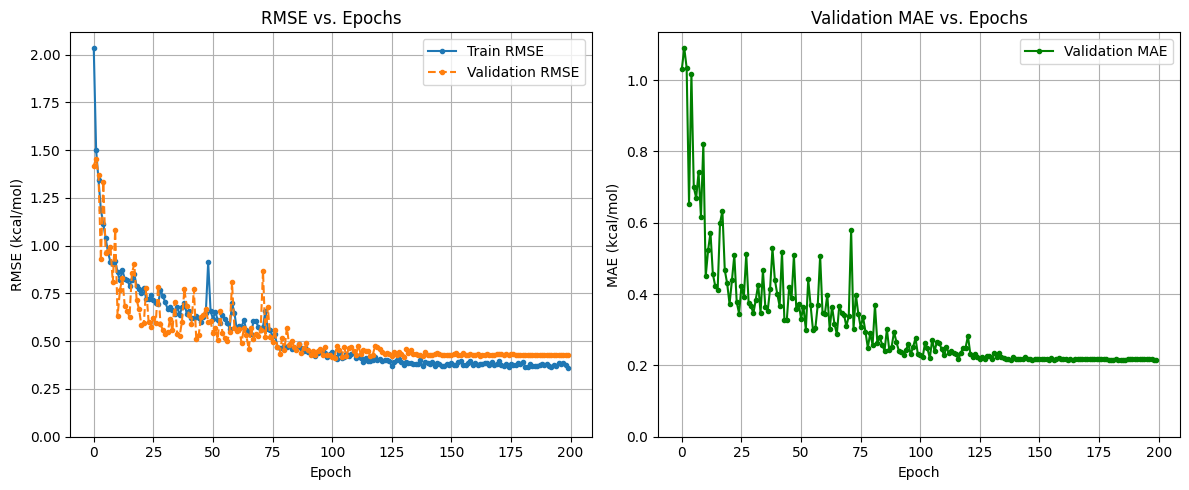


--- Evaluating on Test Set ---
Loading best model for final test...


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL numpy._core.multiarray.scalar was not an allowed global by default. Please use `torch.serialization.add_safe_globals([numpy._core.multiarray.scalar])` or the `torch.serialization.safe_globals([numpy._core.multiarray.scalar])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [ ]:
# --- Main Training & Evaluation Cell (Advanced) ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau # Import new scheduler
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. Training Setup ---
print("--- Setting up Advanced Training Environment ---")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Get node feature dimension from our new 31-dim featurizer
try:
    test_graph = smiles_to_graph('CCO')
    node_feature_dim = test_graph.num_node_features
    print(f"Node feature dimension: {node_feature_dim} (Target: 31)")
    if node_feature_dim != 31:
        raise ValueError("Featurizer is not creating 31 features!")
except Exception as e:
    print(f"Error checking featurizer: {e}")
    node_feature_dim = 31 # Fallback, but this should be 31

model = DualGATModel(node_in_features=node_feature_dim).to(device)
criterion = nn.MSELoss()

# --- NEW OPTIMIZER: AdamW ---
# AdamW is generally more robust and converges faster than SGD.
# We add 'weight_decay' for regularization to help prevent overfitting.
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

# --- NEW SCHEDULER: ReduceLROnPlateau ---
# This scheduler "watches" the validation loss and cuts the LR if it stops improving.
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',      # We want to minimize RMSE
    factor=0.5,      # Reduce LR by 50%
    patience=10      # Wait 10 epochs with no improvement before cutting LR
)

# --- 2. Checkpoint Setup ---
print("\n--- Setting up Checkpointing ---")
try:
    drive.mount('/content/drive')
    CHECKPOINT_DIR = '/content/drive/MyDrive/Solvation_GNN_Checkpoints_v2'
    os.makedirs(CHECKPOINT_DIR, exist_ok=True)
    CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, 'best_gat_model_adamw.pt')
    print(f"Checkpoints will be saved to: {CHECKPOINT_PATH}")
except Exception as e:
    print(f"Google Drive mounting failed: {e}. Checkpoints will not be saved.")
    CHECKPOINT_PATH = None

# --- 3. Define the Training & Evaluation Functions ---
# (These are the same as before, no changes needed)
def train(loader, model, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    num_samples = 0
    for solute_batch, solvent_batch, target_batch in loader:
        if solute_batch is None: continue # From our collate_fn
        solute_batch, solvent_batch, target_batch = solute_batch.to(device), solvent_batch.to(device), target_batch.to(device)
        optimizer.zero_grad()
        predictions = model(solute_batch, solvent_batch)
        loss = criterion(predictions, target_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * solute_batch.num_graphs
        num_samples += solute_batch.num_graphs
    return np.sqrt(total_loss / num_samples) if num_samples > 0 else 0

def evaluate(loader, model, criterion, device):
    model.eval()
    total_loss_mse = 0.0
    total_loss_mae = 0.0
    num_samples = 0
    with torch.no_grad():
        for solute_batch, solvent_batch, target_batch in loader:
            if solute_batch is None: continue # From our collate_fn
            solute_batch, solvent_batch, target_batch = solute_batch.to(device), solvent_batch.to(device), target_batch.to(device)
            predictions = model(solute_batch, solvent_batch)
            loss_mse = criterion(predictions, target_batch)
            loss_mae = F.l1_loss(predictions, target_batch)
            total_loss_mse += loss_mse.item() * solute_batch.num_graphs
            total_loss_mae += loss_mae.item() * solute_batch.num_graphs
            num_samples += solute_batch.num_graphs
    if num_samples == 0: return 0, 0
    rmse = np.sqrt(total_loss_mse / num_samples)
    mae = total_loss_mae / num_samples
    return rmse, mae

print("\n--- Training and Evaluation Functions Defined ---")

# --- 4. Main Training Loop ---
print("\n--- Starting Training ---")
NUM_EPOCHS = 200 # You can increase this to 300 or 500
best_val_rmse = float('inf')
train_rmse_history = []
val_rmse_history = []
val_mae_history = []

for epoch in range(1, NUM_EPOCHS + 1):
    epoch_start_time = time.time()

    current_train_rmse = train(train_loader, model, criterion, optimizer, device)
    current_val_rmse, current_val_mae = evaluate(val_loader, model, criterion, device)

    # --- SCHEDULER STEP ---
    # The scheduler monitors the validation RMSE
    scheduler.step(current_val_rmse)

    epoch_duration = time.time() - epoch_start_time

    # --- Log Metrics ---
    train_rmse_history.append(current_train_rmse)
    val_rmse_history.append(current_val_rmse)
    val_mae_history.append(current_val_mae)

    print(f"Epoch {epoch:03d}/{NUM_EPOCHS} | "
          f"Train RMSE: {current_train_rmse:.4f} | "
          f"Val RMSE: {current_val_rmse:.4f} | "
          f"Val MAE: {current_val_mae:.4f} | "
          f"LR: {optimizer.param_groups[0]['lr']:.6f} | " # Get LR from optimizer
          f"Time: {epoch_duration:.2f}s")

    # --- Checkpoint Saving ---
    if CHECKPOINT_PATH is not None and current_val_rmse < best_val_rmse:
        best_val_rmse = current_val_rmse
        try:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_val_rmse': best_val_rmse,
            }, CHECKPOINT_PATH)
            print(f"    --> Checkpoint saved! New best Val RMSE: {best_val_rmse:.4f}")
        except Exception as e:
            print(f"    Error saving checkpoint: {e}")

print("\n--- Training Complete ---")

# --- 5. Plotting Training Progress ---
if train_rmse_history:
    print("\n--- Plotting Training Progress ---")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_rmse_history, label='Train RMSE', marker='.', linestyle='-')
    plt.plot(val_rmse_history, label='Validation RMSE', marker='.', linestyle='--')
    plt.title('RMSE vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE (kcal/mol)')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)

    plt.subplot(1, 2, 2)
    plt.plot(val_mae_history, label='Validation MAE', marker='.', color='green')
    plt.title('Validation MAE vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MAE (kcal/mol)')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()

# --- 6. Final Test Set Evaluation ---
print("\n--- Evaluating on Test Set ---")
if CHECKPOINT_PATH is not None and os.path.exists(CHECKPOINT_PATH):
    print("Loading best model for final test...")
    checkpoint = torch.load(CHECKPOINT_PATH, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])

    test_rmse, test_mae = evaluate(test_loader, model, criterion, device)

    print("\n--- Final Test Results ---")
    print(f"   Best Model (from Epoch {checkpoint.get('epoch', 'N/A')})")
    print(f"   Test RMSE: {test_rmse:.4f} (Paper: 0.25)")
    print(f"   Test MAE: {test_mae:.4f} (Paper: 0.13)")
else:
    print("No checkpoint saved. Evaluating final model state (which may be overfitted).")
    test_rmse, test_mae = evaluate(test_loader, model, criterion, device)
    print("\n--- Final Test Results (from last epoch) ---")
    print(f"   Test RMSE: {test_rmse:.4f}")
    print(f"   Test MAE: {test_mae:.4f}")

In [ ]:
print("--- Loading Best Model for Final Test ---")

# Define the path to your checkpoint
CHECKPOINT_PATH = '/content/drive/MyDrive/Solvation_GNN_Checkpoints_v2/best_gat_model_adamw.pt'

# Re-initialize a fresh model instance
# (The 'DualGATModel' class and 'node_feature_dim' are still in memory)
model = DualGATModel(node_in_features=node_feature_dim).to(device)

# Load the checkpoint with the fix: weights_only=False
checkpoint = torch.load(CHECKPOINT_PATH, map_location=device, weights_only=False)

# Load the weights into the model
model.load_state_dict(checkpoint['model_state_dict'])

# Run the evaluation
# (The 'evaluate' function, 'test_loader', and 'criterion' are still in memory)
test_rmse, test_mae = evaluate(test_loader, model, criterion, device)

print("\n--- Final Test Results ---")
print(f"   Best Model (from Epoch {checkpoint.get('epoch', 'N/A')})")
print(f"   Test RMSE: {test_rmse:.4f} (Paper: 0.25)")
print(f"   Test MAE: {test_mae:.4f} (Paper: 0.13)")

--- Loading Best Model for Final Test ---


[17:09:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)



--- Final Test Results ---
   Best Model (from Epoch 102)
   Test RMSE: 0.4471 (Paper: 0.25)
   Test MAE: 0.2351 (Paper: 0.13)


In [ ]:
import torch
import os
import time # To time epochs
import numpy as np
import matplotlib.pyplot as plt # Import plotting library

# --- 1. Initialize lists to store metrics ---
train_rmse_history = []
val_rmse_history = []
val_mae_history = []
epochs_processed = [] # To keep track of epoch numbers

# --- 2. Training Parameters ---
NUM_EPOCHS = 200 # Total number of training epochs
best_val_rmse = float('inf') # Initialize best validation score
start_epoch = 1              # Default starting epoch

# --- 3. Load Checkpoint (if exists) ---
print("--- Checking for existing checkpoint ---")
# Ensure CHECKPOINT_PATH is defined and Drive is mounted
if 'CHECKPOINT_PATH' in locals() and CHECKPOINT_PATH is not None and os.path.exists(CHECKPOINT_PATH):
    try:
        # Load checkpoint data onto the correct device (CPU/GPU), allow loading non-weight objects
        print(f"Loading checkpoint from: {CHECKPOINT_PATH}")
        checkpoint = torch.load(CHECKPOINT_PATH, map_location=device, weights_only=False) # *** Use weights_only=False ***

        # Restore model weights
        model.load_state_dict(checkpoint['model_state_dict'])
        print("Model weights loaded.")

        # Restore optimizer state
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        print("Optimizer state loaded.")

        # Restore scheduler state (if available)
        if 'scheduler_state_dict' in checkpoint:
             scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
             print("Scheduler state loaded.")
        else: # Fallback for older checkpoints without scheduler state
             last_epoch = checkpoint.get('epoch', 0)
             print(f"Scheduler state not found in checkpoint (epoch {last_epoch}). Fast-forwarding scheduler.")
             # Fast-forward scheduler to the correct state
             for _ in range(last_epoch):
                 scheduler.step()

        # Set starting epoch and best score from checkpoint
        start_epoch = checkpoint.get('epoch', 0) + 1
        best_val_rmse = checkpoint.get('best_val_rmse', float('inf'))

        print(f"Checkpoint loaded successfully. Resuming training from epoch {start_epoch}.")
        print(f"Previous best validation RMSE: {best_val_rmse:.4f}")

    except FileNotFoundError:
        print("Checkpoint file not found. Starting training from scratch.")
        start_epoch = 1
        best_val_rmse = float('inf')
    except Exception as e:
        print(f"Error loading checkpoint: {e}. Training will start from scratch.")
        # Reset model and optimizer to initial state if loading failed partially
        model = DualGATModel(node_in_features=node_feature_dim).to(device) # Re-initialize model
        optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, nesterov=True) # Re-initialize optimizer
        scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS, eta_min=1e-6) # Re-initialize scheduler
        start_epoch = 1
        best_val_rmse = float('inf')
else:
    print("No valid checkpoint path found or Drive not mounted. Starting training from scratch.")
    start_epoch = 1
    best_val_rmse = float('inf')


# --- 4. Main Training Loop ---
print("\n--- Starting Training ---")
if start_epoch > NUM_EPOCHS:
    print(f"Training already completed up to epoch {start_epoch-1}. Skipping training loop.")
else:
    for epoch in range(start_epoch, NUM_EPOCHS + 1):
        epoch_start_time = time.time() # Time the epoch

        # --- Train ---
        # Call the train function (updates model weights)
        current_train_rmse = train(train_loader, model, criterion, optimizer, device)

        # --- Evaluate ---
        # Call the evaluate function (measures performance on validation set)
        current_val_rmse, current_val_mae = evaluate(val_loader, model, criterion, device)

        # --- Scheduler Step ---
        # Adjust the learning rate based on the Cosine Annealing schedule
        scheduler.step(current_val_rmse)

        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time

        # --- Log Metrics ---
        # Store the results for later plotting
        epochs_processed.append(epoch)
        train_rmse_history.append(current_train_rmse)
        val_rmse_history.append(current_val_rmse)
        val_mae_history.append(current_val_mae)

        # --- Print Progress ---
        # Display metrics for the current epoch
        print(f"Epoch {epoch:03d}/{NUM_EPOCHS} | "
              f"Train RMSE: {current_train_rmse:.4f} | "
              f"Val RMSE: {current_val_rmse:.4f} | "
              f"Val MAE: {current_val_mae:.4f} | "
              f"LR: {scheduler.get_last_lr()[0]:.6f} | " # Display current learning rate
              f"Time: {epoch_duration:.2f}s")

        # --- Checkpoint Saving ---
        # Save the model if the validation RMSE improved
        if 'CHECKPOINT_PATH' in locals() and CHECKPOINT_PATH is not None and current_val_rmse < best_val_rmse:
            best_val_rmse = current_val_rmse # Update the best score
            try:
                # Save model state, optimizer state, scheduler state, epoch, and best score
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'scheduler_state_dict': scheduler.state_dict(),
                    'best_val_rmse': best_val_rmse,
                }, CHECKPOINT_PATH)
                print(f"    --> Checkpoint saved! New best Val RMSE: {best_val_rmse:.4f}")
            except Exception as e:
                print(f"    Error saving checkpoint: {e}")

    print("\n--- Training Complete ---")

# --- 5. Plotting Training Progress ---
# Ensure metrics were actually logged before plotting
if epochs_processed:
    print("\n--- Plotting Training Progress ---")
    plt.figure(figsize=(12, 5)) # Create a figure to hold the plots

    # Plot 1: RMSE vs. Epochs
    plt.subplot(1, 2, 1) # Arrange plots side-by-side (1 row, 2 columns, 1st plot)
    plt.plot(epochs_processed, train_rmse_history, label='Train RMSE', marker='.', linestyle='-')
    plt.plot(epochs_processed, val_rmse_history, label='Validation RMSE', marker='.', linestyle='--')
    plt.title('RMSE vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE (kcal/mol)')
    plt.legend() # Show legend
    plt.grid(True) # Add grid lines
    plt.ylim(bottom=0) # Start y-axis at 0

    # Plot 2: MAE vs. Epochs
    plt.subplot(1, 2, 2) # Arrange plots side-by-side (

--- Checking for existing checkpoint ---
Loading checkpoint from: /content/drive/MyDrive/Solvation_GNN_Checkpoints_v2/best_gat_model_adamw.pt
Model weights loaded.
Optimizer state loaded.
Scheduler state loaded.
Checkpoint loaded successfully. Resuming training from epoch 103.
Previous best validation RMSE: 0.4147

--- Starting Training ---


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[17:15:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:15:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:15:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:2

Epoch 103/200 | Train RMSE: 0.4129 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 56.31s


[17:16:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:16:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:09]

Epoch 104/200 | Train RMSE: 0.4197 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 57.18s


[17:17:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:17:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:04] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:08] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:14]

Epoch 105/200 | Train RMSE: 0.4070 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 55.36s


[17:18:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:42] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:18:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:03]

Epoch 106/200 | Train RMSE: 0.4272 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 55.20s


[17:19:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:19:55]

Epoch 107/200 | Train RMSE: 0.4207 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 56.40s


[17:20:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:57] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:20:58]

Epoch 108/200 | Train RMSE: 0.4164 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 56.50s


[17:21:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:38] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:39] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:41] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:46] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:50] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:21:55]

Epoch 109/200 | Train RMSE: 0.4115 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 55.47s


[17:22:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:28] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:29] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:40] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:22:51]

Epoch 110/200 | Train RMSE: 0.4109 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 55.70s


[17:23:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:24] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:25] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:27] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:31] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:23:35]

Epoch 111/200 | Train RMSE: 0.4142 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 54.66s


[17:24:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:30] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:32] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:33] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:34] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:35] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:36] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:37] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:24:38]

Epoch 112/200 | Train RMSE: 0.4064 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000250 | Time: 54.97s


[17:25:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:23] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:26] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:25:28]

Epoch 113/200 | Train RMSE: 0.4040 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 55.65s


[17:26:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:18] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:19] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:20] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:26:26]

Epoch 114/200 | Train RMSE: 0.4130 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 56.20s


[17:27:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:10] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:15] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:18]

Epoch 115/200 | Train RMSE: 0.4057 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 55.16s


[17:27:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:27:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:00] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:11] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:14] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:21] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:22] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:23]

Epoch 116/200 | Train RMSE: 0.4082 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 55.56s


[17:28:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:52] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:28:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:03] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:05] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:12] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:13] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:16] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:17] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:19]

Epoch 117/200 | Train RMSE: 0.4079 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 55.81s


[17:29:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:49] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:56] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:29:58] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:02] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:03]

Epoch 118/200 | Train RMSE: 0.4191 | Val RMSE: 0.4147 | Val MAE: 0.2224 | LR: 0.000125 | Time: 54.28s


[17:30:43] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:44] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:47] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:48] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:51] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:53] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:54] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:55] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:30:59] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:01] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:06] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:07] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:09] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[17:31:09]

KeyboardInterrupt: 